In [1]:
import sys, os
#path2add = os.path.normpath(os.path.abspath(os.path.join(os.path.dirname(__file__), os.path.pardir, 'dir1')))
#print(os.getcwd())
parent_path = os.path.normpath(os.path.abspath(os.path.join(os.getcwd(), os.path.pardir)))
#print(path2add)
sys.path.append(parent_path)
sys.path.append(os.path.normpath(os.path.join(parent_path,"gyrii")))

import json
import yaml
from underpinnings.OccupancyMap2 import OccupancyMap2




In [2]:
localmap=OccupancyMap2(resolution=0.05,npoints_x=400,npoints_y=400)
localmap.load_from_file("../local_map.npy")

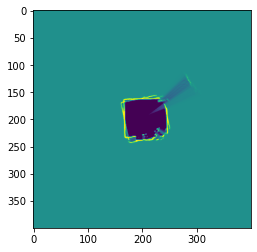

In [3]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(localmap.gridmap_logodds)
plt.show()

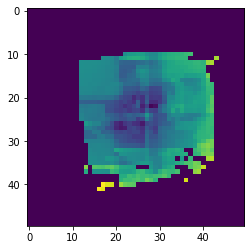

In [21]:
import numpy as np
test_pts=np.linspace(-3,3,50)
entmap=np.zeros([ len(test_pts),len(test_pts)])
#print(localmap.predict_distance(np.array([0,0]),0))
#return
for i in range(len(test_pts)):
    for j in range(len(test_pts)):
        x=test_pts[i]
        y=test_pts[j]
        cx,cy=localmap.coord_to_cell([x,y])
        if localmap.gridmap_logodds[cx,cy]<-2.0:
            scan=localmap.predict_scan(np.array([x,y]),10)        
            entmap[i,j]=scan.get_entropy()
#print(entmap)
#print(test_pts)

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(entmap)
plt.show()